# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=42)

In [3]:
X

array([[ 0.57247141,  1.68543215, -1.46030244, ...,  0.40609402,
        -1.40022917, -1.165202  ],
       [-0.23105954, -0.33847827,  0.86406998, ..., -0.50286875,
         0.49478769,  1.3111623 ],
       [ 1.08990496, -0.17377108, -0.80219941, ..., -0.54740752,
        -0.82792411,  0.03480754],
       ...,
       [-0.78014388,  1.2798256 , -0.63045845, ...,  2.15912115,
        -0.86067235, -0.3804559 ],
       [ 0.70149478, -1.44592095,  0.0340081 , ...,  0.29094736,
        -2.74131577, -0.79088179],
       [-1.43267129, -0.16358586, -0.40436199, ..., -0.66684872,
         1.61357548, -0.60747229]])

In [4]:
y

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [5]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
lor = LogisticRegression()
lor.fit(X_train, y_train)

y_pred = lor.predict(X_test)

print("accuracy_score :", accuracy_score(y_test, y_pred))
print("precision_score :", precision_score(y_test, y_pred))
print("recall_score :", recall_score(y_test, y_pred))
print("*"*50)
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))
print("*"*50)
print("classification_report :\n",classification_report(y_test, y_pred))

accuracy_score : 0.872
precision_score : 0.8947368421052632
recall_score : 0.8360655737704918
**************************************************
confusion_matrix :
 [[116  12]
 [ 20 102]]
**************************************************
classification_report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       128
           1       0.89      0.84      0.86       122

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



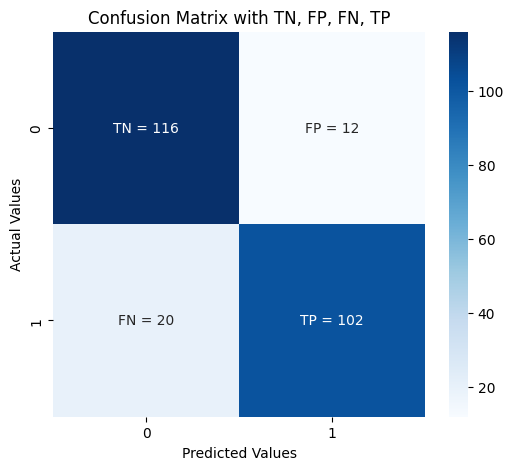

In [7]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Plotting the confusion matrix with labels
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=[[f'TN = {TN}', f'FP = {FP}'], [f'FN = {FN}', f'TP = {TP}']], fmt='', cmap='Blues')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix with TN, FP, FN, TP')
plt.show()

## Hyperparameter Tuning

In [8]:
model = LogisticRegression()
# params
penalty = ['l1', 'l2', 'elasticnet']
c_values = [0.001, 0.01, 0.1, 1 ,10, 100]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [9]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [10]:
cv = StratifiedKFold()
grid = GridSearchCV(model, param_grid=params, scoring='accuracy',cv=cv, n_jobs=-1, refit=True)

In [11]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [13]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [14]:
grid.best_score_

0.8640000000000001

In [15]:
y_pred_grid = grid.predict(X_test)

print("accuracy_score :", accuracy_score(y_test, y_pred_grid))

print("*"*50)
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred_grid))
print("*"*50)
print("classification_report :\n",classification_report(y_test, y_pred_grid))

accuracy_score : 0.872
**************************************************
confusion_matrix :
 [[117  11]
 [ 21 101]]
**************************************************
classification_report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       128
           1       0.90      0.83      0.86       122

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



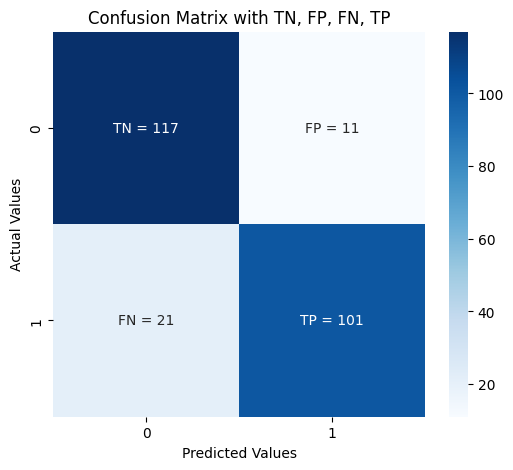

In [16]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_grid)

# Extract TN, FP, FN, TP from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Plotting the confusion matrix with labels
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=[[f'TN = {TN}', f'FP = {FP}'], [f'FN = {FN}', f'TP = {TP}']], fmt='', cmap='Blues')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix with TN, FP, FN, TP')
plt.show()

## RandomizedSearchCV

In [17]:
model = LogisticRegression()
randomCV = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='accuracy', cv=5, n_jobs=-1)

In [18]:
randomCV.fit(X_train, y_train)
randomCV.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

In [19]:
randomCV.best_score_

0.8586666666666666

In [20]:
y_pred_randomCV = randomCV.predict(X_test)

print("accuracy_score :", accuracy_score(y_test, y_pred_randomCV))

print("*"*50)
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred_randomCV))
print("*"*50)
print("classification_report :\n",classification_report(y_test, y_pred_randomCV))

accuracy_score : 0.872
**************************************************
confusion_matrix :
 [[117  11]
 [ 21 101]]
**************************************************
classification_report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       128
           1       0.90      0.83      0.86       122

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



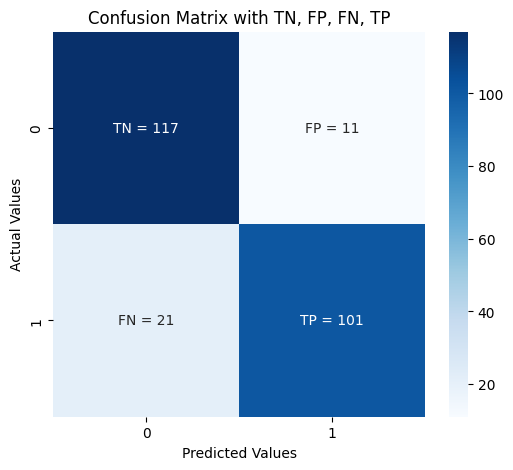

In [21]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_randomCV)

# Extract TN, FP, FN, TP from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Plotting the confusion matrix with labels
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=[[f'TN = {TN}', f'FP = {FP}'], [f'FN = {FN}', f'TP = {TP}']], fmt='', cmap='Blues')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix with TN, FP, FN, TP')
plt.show()